In [17]:
# Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

In [15]:
# Create the list of stocks you wish to get data on
stock_string = ['LLY', 'JNJ', 'ABBV', 'AZN', 'NVS', 'CVS', 'WBA', 'NVO',
                'PFE', 'TCNNF', 'MRK']

In [89]:
# Be sure to change the path in the last line
sector_path = '../data/Pharma/'

# Loop through the different strings to get the data
for i in range(len(stock_string)):
    power = yf.Ticker(f'{stock_string[i]}')
    df = power.history(start='2020-01-01', end=None)
    df['Previous_close'] = df['Close'].shift(1) 
    df['Return'] = df['High']/df['Previous_close']-1
    df.to_csv(f'{sector_path}{stock_string[i]}.csv')

    if i == 0:
        df_metrics = df['Return'].describe().to_frame(name=stock_string[i])
        close_comb = pd.concat([df['Close']], axis=1)
    else:
        df_metrics = df_metrics.join(df['Return'].describe().to_frame(name=stock_string[i]))
        close_comb = pd.concat([close_comb, df['Close']], axis=1)

# Save the metrics dataframe
df_metrics.to_csv(f'{sector_path}Metrics.csv')

# Save the close and correlation dataframes
close_comb.columns = stock_string
correlation_matrix = close_comb.corr()
close_comb.to_csv(f'{sector_path}Close.csv')
correlation_matrix.to_csv(f'{sector_path}Correlation.csv')
        

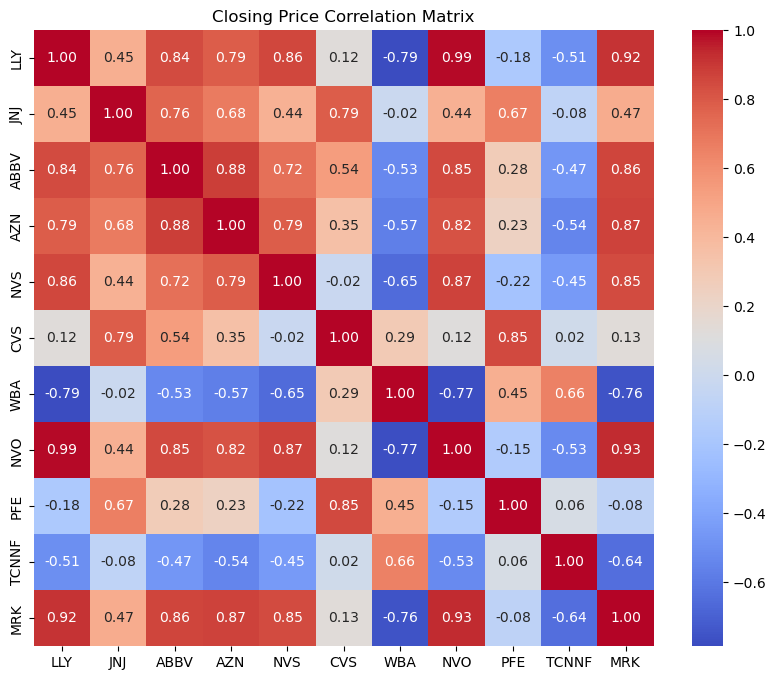

In [103]:
correlation_matrix = pd.read_csv(f'{sector_path}Correlation.csv', index_col=0)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Closing Price Correlation Matrix')
plt.show()